In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas
import xarray as xr
import netCDF4
%matplotlib inline

In [2]:
import textwrap

# 1. Global Earthquakes

In [3]:
# 导入数据
E=pd.read_csv('usgs_earthquakes.csv')
E

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [4]:
# 筛选出2014年震级最大的50个地震事件
df=E.sort_values('mag',ascending=False).head(50)[['latitude','longitude','mag']]
df

,latitude,longitude,mag
37371,-19.6097,-70.7691,8.2
50562,51.8486,178.7352,7.9
36918,-20.5709,-70.4931,7.7
33808,-11.2701,162.1481,7.6
31496,-6.7547,155.0241,7.5
33537,-11.4633,162.0511,7.4
95913,12.5262,-88.1225,7.3
31850,17.3970,-100.9723,7.2
34318,-6.5858,155.0485,7.1
106285,1.8929,126.5217,7.1


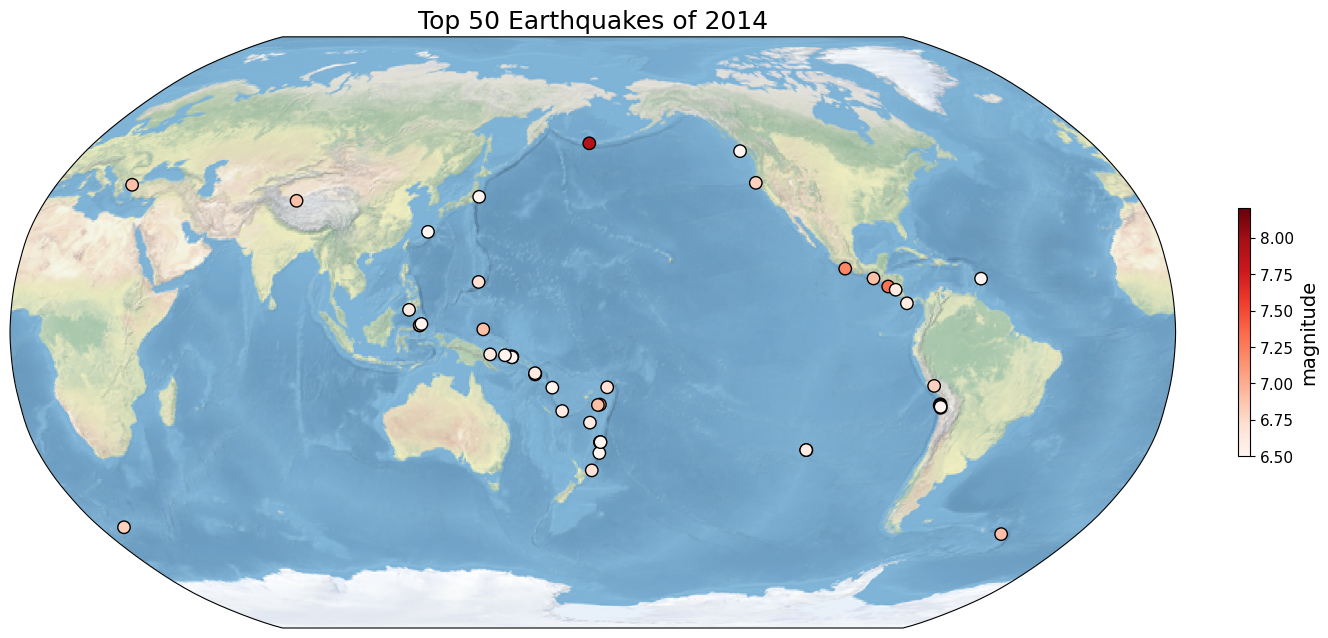

In [5]:
#地图样式参考的代码网站：https://blog.csdn.net/rs_gis/article/details/105754345
#在地图上绘制散点参考的代码网站：https://zhuanlan.zhihu.com/p/360407544

# 导入colormap
cm = plt.cm.get_cmap('Reds')

# 绘制地图
f = plt.figure(figsize=(16,9))                        #定义画布大小
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))   #axes创建坐标系图形对象
ax.stock_img()

# 在地图上增加地震发生的地点，并用颜色表示震级
color=ax.scatter(df['longitude'],df['latitude'],
                 c=df['mag'],edgecolors='k',cmap=cm,s=80,
                 transform=ccrs.PlateCarree())

# 增加colorbar
cb=plt.colorbar(color,fraction=0.01)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='magnitude',loc='center',size=14) 

# 设置图片标题
plt.title('Top 50 Earthquakes of 2014',size=18)
plt.show()

# 2. Explore a netCDF dataset

In [6]:
# 导入数据，使用的是assignment3 相同的数据
BC=xr.open_dataset("BC-em-anthro_input4MIPs_emissions_CMIP_CEDS-2017-05-18_gn_200001-201412.nc",engine="netcdf4")
BC_emiss=BC.BC_em_anthro.sel(sector=2)
BC_emiss

<xarray.DataArray 'BC_em_anthro' (time: 180, lat: 360, lon: 720)>
[46656000 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
    sector   int32 2
  * time     (time) object 2000-01-16 00:00:00 ... 2014-12-16 00:00:00
Attributes:
    units:         kg m-2 s-1
    long_name:     BC Anthropogenic Emissions
    cell_methods:  time: mean

In [7]:
# 导入经纬度数据
# 参考的网站为：https://cloud.tencent.com/developer/article/1790266
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

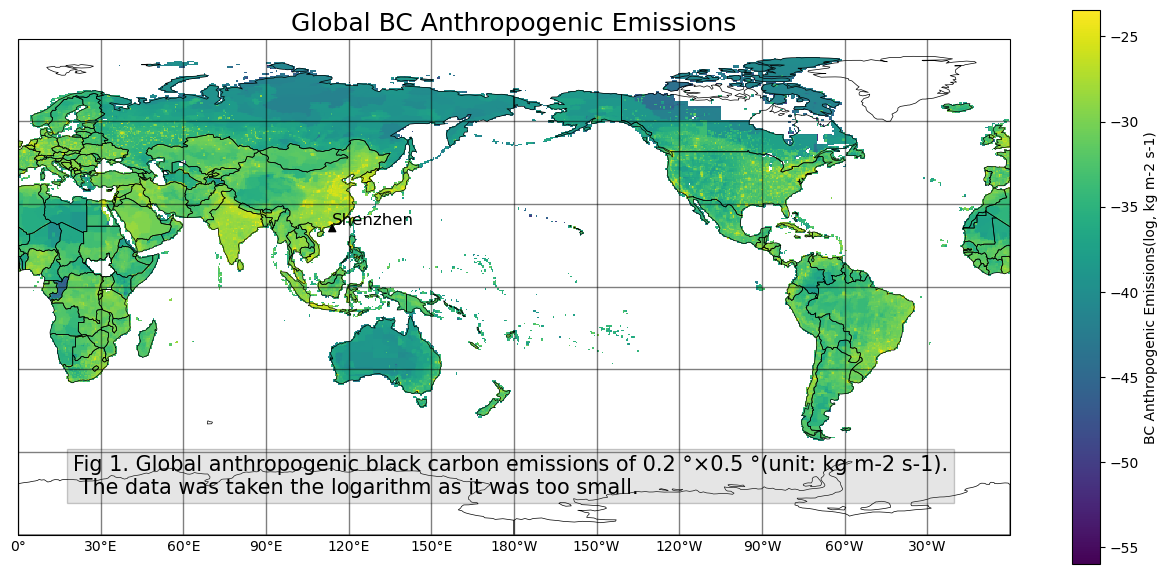

In [8]:
# 2.1
# 关闭warning
import warnings
warnings.filterwarnings('ignore')

# 绘制图像
plt.figure(figsize=(16,9), dpi=100)
proj = ccrs.PlateCarree(central_longitude=180) 
ax = plt.axes(projection=proj)

# 导入黑炭排放的数据
# 其中colorbar的参数设置参考了这个网址：https://blog.csdn.net/weixin_42372313/article/details/113705254
bc=np.log(BC_emiss.mean(dim='time')).plot(ax=ax, transform=ccrs.PlateCarree(),
                                          cbar_kwargs={'shrink': 0.8,'label':'BC Anthropogenic Emissions(log, kg m-2 s-1)'})

# 添加国界
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# 添加深圳的经纬度，并且在图里标记出来
central_lon,central_lat=114.06-180, 22.54
ax.annotate('Shenzhen',(central_lon,central_lat),size=12,
            arrowprops=dict(facecolor='black', 
                            headwidth=5, headlength=5, 
                            shrink=0.005),
            transform=ccrs.PlateCarree())

# 添加说明文本
tx1="Fig 1. Global anthropogenic black carbon emissions of 0.2 °×0.5 °(unit: kg m-2 s-1).\n The data was taken the logarithm as it was too small."
plt.text(20, -75, 
         tx1, size = 15, transform=ccrs.PlateCarree(),
        bbox=dict(facecolor="grey",alpha=0.2))

# 画经纬度
gl = ax.gridlines(draw_labels=True,
                  crs=ccrs.PlateCarree(), 
                  linewidth=1, color='black', alpha=0.5)
gl.top_labels=False  #删除顶部的标记
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

# 添加图像标题
ax.set_title('Global BC Anthropogenic Emissions',fontsize=18)
plt.show()

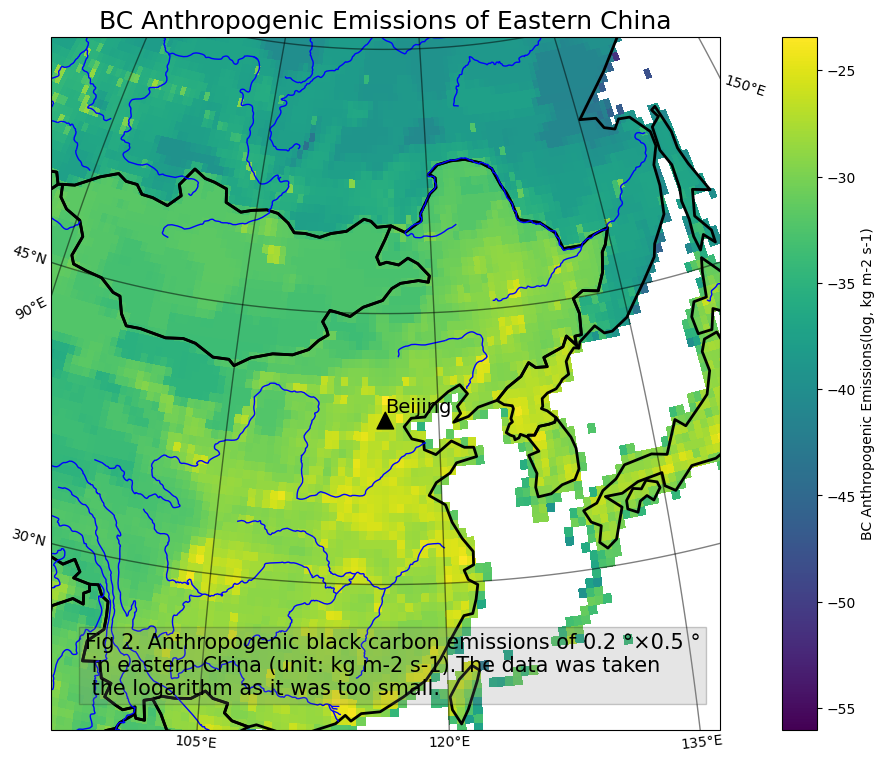

In [9]:
# 2.2
# 关闭warning
import warnings
warnings.filterwarnings('ignore')

# 绘制图像
plt.figure(figsize=(16,9),dpi=100)

# 添加北京的经纬度，设置为图像的中心点
central_lon, central_lat = 116.2, 39.56 # Beijing
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)
extent = [central_lon-20, central_lon+20, central_lat-20, central_lat+20]  #设置区域范围
ax.set_extent(extent)

# 添加黑炭数据
bc_region=np.log(BC_emiss.mean(dim='time')).plot(ax=ax, transform=ccrs.PlateCarree(),
                                          cbar_kwargs={'shrink': 1,'label':'BC Anthropogenic Emissions(log, kg m-2 s-1)'})

# 添加国界
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=2))

# 添加河流
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=2)

# 添加北京的标记
ax.annotate('Beijing',(central_lon,central_lat),size=14,
            arrowprops=dict(facecolor='black', shrink=0.05))

# 添加图像的说明文本
tx="Fig 2. Anthropogenic black carbon emissions of 0.2 °×0.5 °\n in eastern China (unit: kg m-2 s-1).The data was taken \n the logarithm as it was too small."
plt.text(98, 22, 
         tx, size = 15, transform=ccrs.PlateCarree(),
        bbox=dict(facecolor="grey",alpha=0.2))

# 添加经纬度
gl = ax.gridlines(draw_labels=True,crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,15))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 15))

# 添加图像标题
ax.set_title('BC Anthropogenic Emissions of Eastern China',fontsize=18)
plt.show()